In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

cifar_dataset = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
def plot_history(history):
  # Function to plot loss and accuracy history of model
  history_dict = history.history
  epochs_range = range(1, epochs+1)

  # Get loss history
  loss_values = history_dict['loss']
  test_loss_values = history_dict['val_loss']

  # Get accuracy history
  acc_values = history_dict['acc']
  test_acc_values = history_dict['val_acc']

  # plot loss
  plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
  plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
  plt.title('Training and test loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # plot accuracy
  plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
  plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
  plt.title('Training and test accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## Underfitting Model

Build and train the model

In [0]:
# set up the layers
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.4322 - acc: 0.4903 - val_loss: 1.2165 - val_acc: 0.5718
Epoch 2/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.1200 - acc: 0.6081 - val_loss: 1.1144 - val_acc: 0.6037
Epoch 3/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.9873 - acc: 0.6550 - val_loss: 1.1382 - val_acc: 0.6017
Epoch 4/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.8947 - acc: 0.6863 - val_loss: 1.0425 - val_acc: 0.6340
Epoch 5/10
50000/50000 [==============================] - 49s 977us/sample - loss: 0.8183 - acc: 0.7137 - val_loss: 1.0375 - val_acc: 0.6380
Epoch 6/10
50000/50000 [==============================] - 47s 937us/sample - loss: 0.7479 - acc: 0.7379 - val_loss: 1.0353 - val_acc: 0.6438
Epoch 7/10
50000/50000 [=======

Evaluating the model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 316us/sample - loss: 1.1754 - acc: 0.6429
Test accuracy: 0.6429


Plotting accuracy and loss over epochs

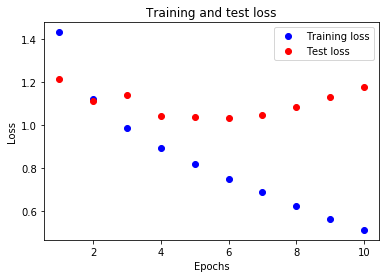

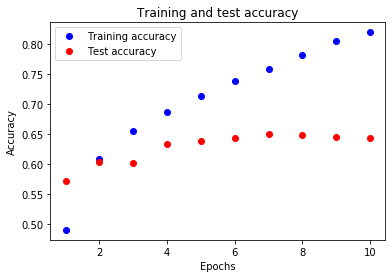

In [0]:
plot_history(history)

## Overfitting Model

Build and train the model

In [0]:
# set up the layers
model = keras.Sequential([
  keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
  keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
  keras.layers.MaxPooling2D((2, 2), padding='same'),
  keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  keras.layers.MaxPooling2D((2, 2), padding='same'),
  keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  keras.layers.MaxPooling2D((2, 2), padding='same'),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

Evaluating the model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 19s 2ms/sample - loss: 1.0119 - acc: 0.7393
Test accuracy: 0.7393


Plotting accuracy and loss over epochs

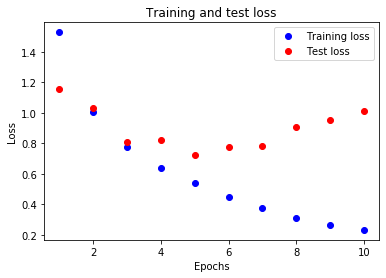

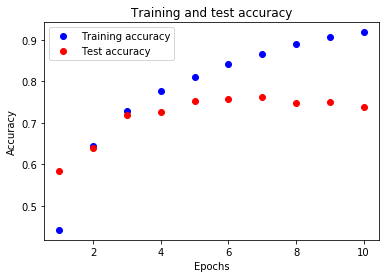

In [0]:
plot_history(history)

## Well-fitted Model

Build the model

In [0]:
# set up the layers
model = keras.Sequential([
  keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.ReLU(),
  keras.layers.Conv2D(32, (3, 3), padding='same', use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.ReLU(),
  keras.layers.MaxPooling2D((2, 2), padding='same'),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(64, (3, 3), padding='same', use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.ReLU(),
  keras.layers.Conv2D(64, (3, 3), padding='same', use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.ReLU(),
  keras.layers.MaxPooling2D((2, 2), padding='same'),
  keras.layers.Dropout(0.3),
  keras.layers.Conv2D(128, (3, 3), padding='same', use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.ReLU(),
  keras.layers.Conv2D(128, (3, 3), padding='same', use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.ReLU(),
  keras.layers.MaxPooling2D((2, 2), padding='same'),
  keras.layers.Dropout(0.4),
  keras.layers.Flatten(),
  keras.layers.Dense(128, use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.ReLU(),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9216      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_8 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)       

Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 24s 2ms/sample - loss: 0.4717 - acc: 0.8417
Test accuracy: 0.8417


Plotting accuracy and loss over epochs

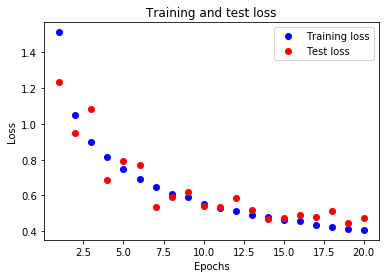

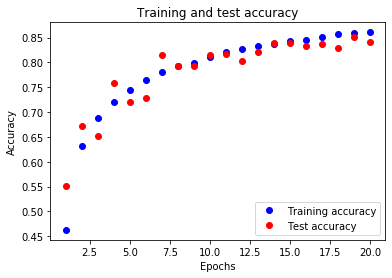

In [0]:
plot_history(history)

Make predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], int(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], int(true_label[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

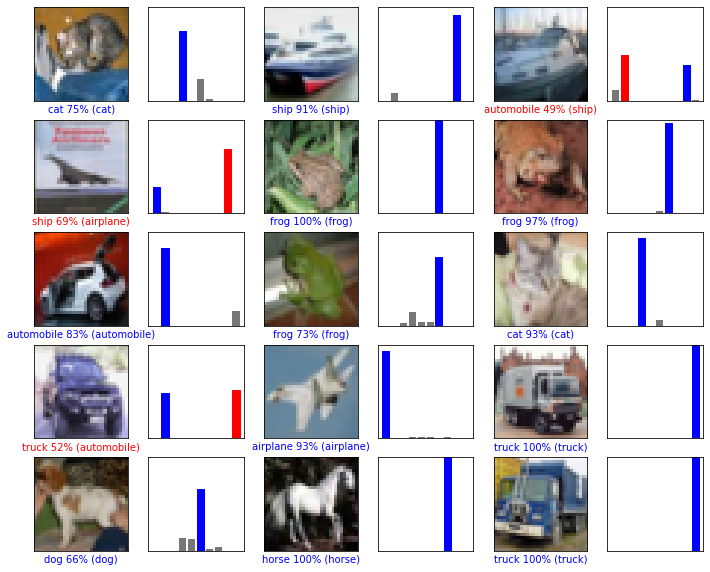

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
